In [2]:
import os
import cv2
import numpy as np

IMG_WIDTH = 256
IMG_HEIGHT = 256

def load_images(image_folder, mask_folder):
    images = []
    masks = []

    # List of image and mask files
    image_files = sorted(os.listdir(image_folder))
    mask_files = sorted(os.listdir(mask_folder))

    print(f"Image Files: {image_files}")
    print(f"Mask Files: {mask_files}")

    # Iterate through image and mask files
    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(image_folder, img_file)
        mask_path = os.path.join(mask_folder, mask_file)

        # Read and resize the image
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Use IMREAD_COLOR for 3-channel images
        if img is None:
            print(f"Failed to read image {img_file}.")
            continue
        
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))  # Resize image
        img = img / 255.0  # Normalize the image to [0, 1]

        # Read and resize the mask
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Mask should be grayscale
        if mask is None:
            print(f"Failed to read mask {mask_file}.")
            continue
        
        mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))  # Resize mask
        mask = np.expand_dims(mask, axis=-1)  # Add a channel dimension to mask
        mask = mask / 255.0  # Normalize the mask to [0, 1]

        # Append image and mask to their respective lists
        images.append(img)
        masks.append(mask)

    print(f"Successfully loaded {len(images)} images and {len(masks)} masks.")
    return np.array(images), np.array(masks)

# Provide correct paths to your image and mask folders
image_folder = 'train/original_image'
mask_folder = 'train/binary_mask'

# Load images and masks
images, masks = load_images(image_folder, mask_folder)

if images is not None and masks is not None:
    print(f"Loaded {len(images)} images and {len(masks)} masks.")
else:
    print("Error loading images and masks.")

masks.shape


Image Files: ['.ipynb_checkpoints', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '008

(750, 256, 256, 1)

In [4]:
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [6]:
X_train, X_val, y_train, y_val = train_test_split(images , masks, test_size=0.2, random_state=42)


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_segnet(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # Decoder
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.UpSampling2D((2, 2))(x)
    
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.UpSampling2D((2, 2))(x)
    
    # Output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(x)
    
    model = models.Model(inputs, outputs)
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build the model
input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)  # 3 if RGB images, 1 if grayscale
segnet = build_segnet(input_shape=input_shape)

segnet.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 1)    │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,089 (1.13 MB)

 Trainable params: 297,089 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = segnet.fit(X_train, y_train, 
                     batch_size=8, 
                     epochs=15, 
                     validation_data=(X_val, y_val))

# Save the model after training
segnet.save('segnet_model.h5')


Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9217 - loss: 0.2174 - val_accuracy: 0.9830 - val_loss: 0.0825
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9841 - loss: 0.0741 - val_accuracy: 0.9830 - val_loss: 0.0775
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.9835 - loss: 0.0715 - val_accuracy: 0.9830 - val_loss: 0.0644
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9831 - loss: 0.0669 - val_accuracy: 0.9830 - val_loss: 0.0624
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9842 - loss: 0.0604 - val_accuracy: 0.9830 - val_loss: 0.0646
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.9835 - loss: 0.0628 - val_accuracy: 0.9830 - val_loss: 0.0602
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9839 - loss: 0.0593 - val_accuracy: 0.9830 - val_loss: 0.0584
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9840 - loss: 0.0565 - val_accuracy: 0.9830 - val_

In [25]:
evaluation = segnet.evaluate(X_val, y_val)
print(f"Loss: {evaluation[0]}")
print(f"Accuracy: {evaluation[1]}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9854 - loss: 0.0457
Loss: 0.04900685325264931
Accuracy: 0.9843257665634155


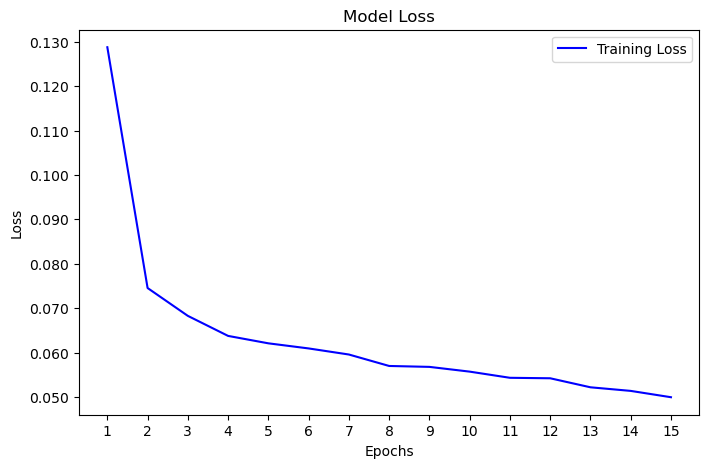

In [33]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(8, 5))

plt.plot(epochs, history.history['loss'], label='Training Loss', color='blue')
#plt.scatter(epochs, history.history['val_loss'], label='Validation Loss', color='red')

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.xticks(epochs)  
plt.legend(loc='upper right')

plt.show()


In [36]:
predictions = model.predict(X_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


In [49]:
thresholded_predictions = (predictions > 0.2).astype(np.uint8)

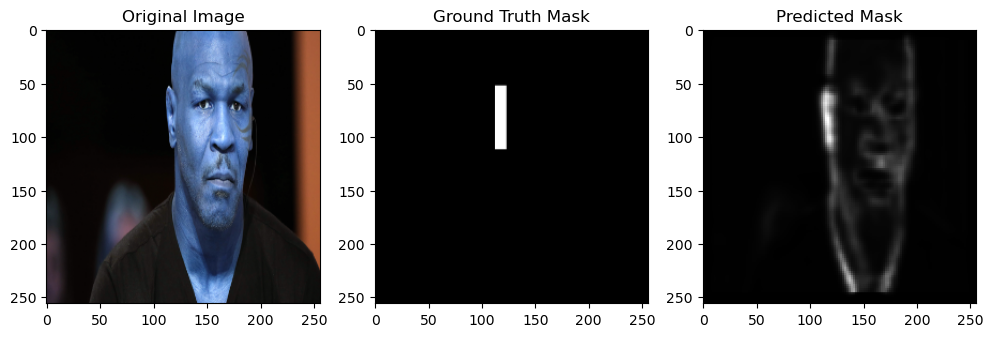

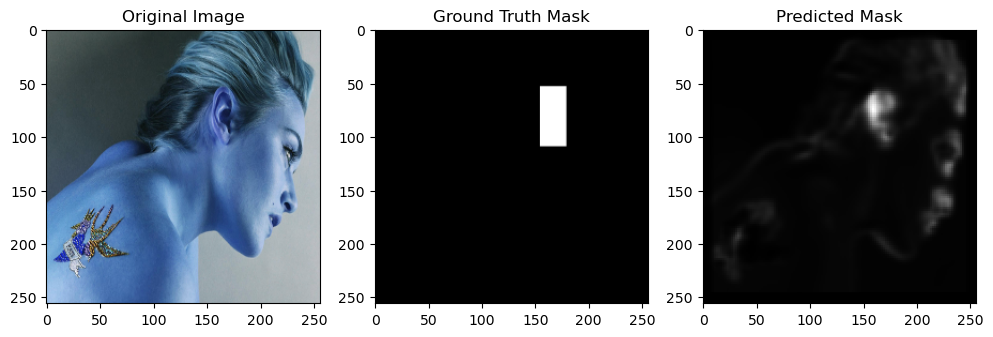

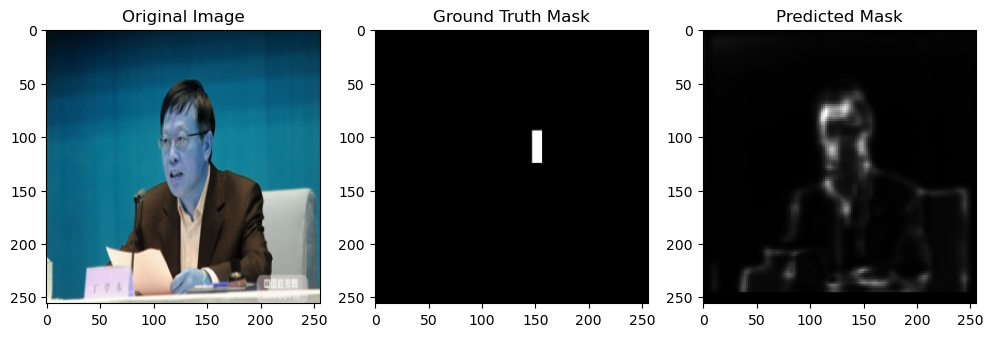

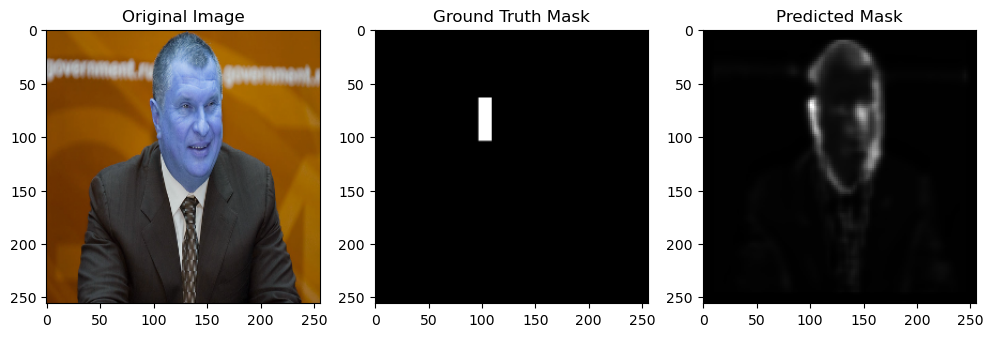

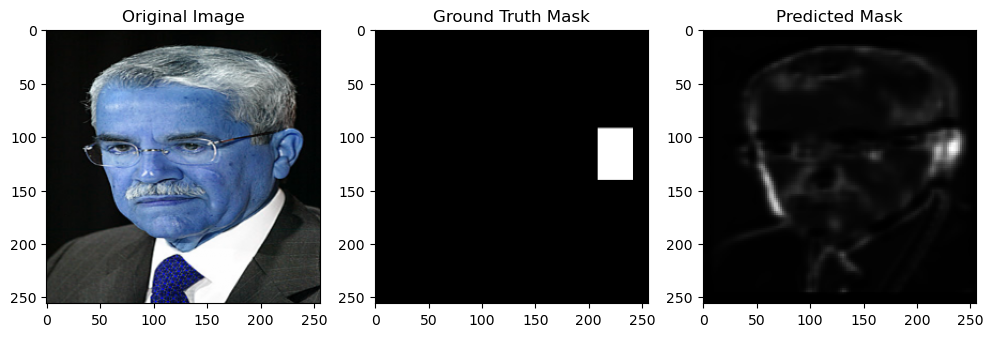

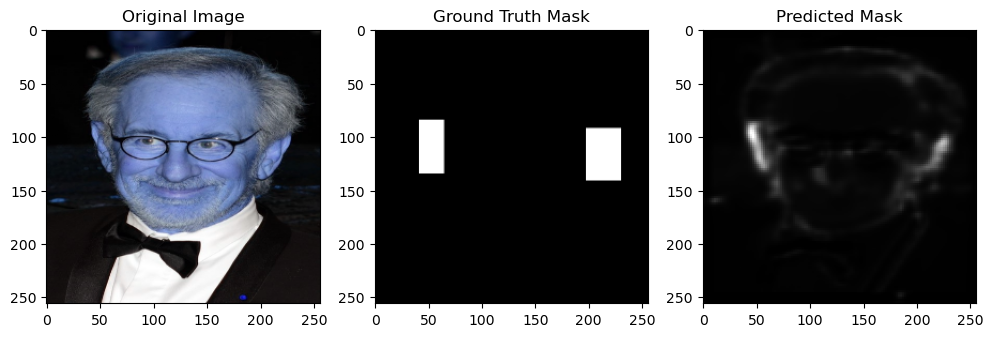

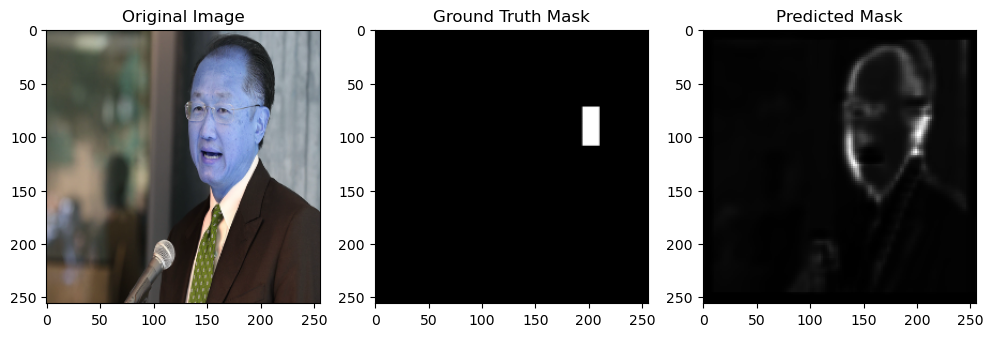

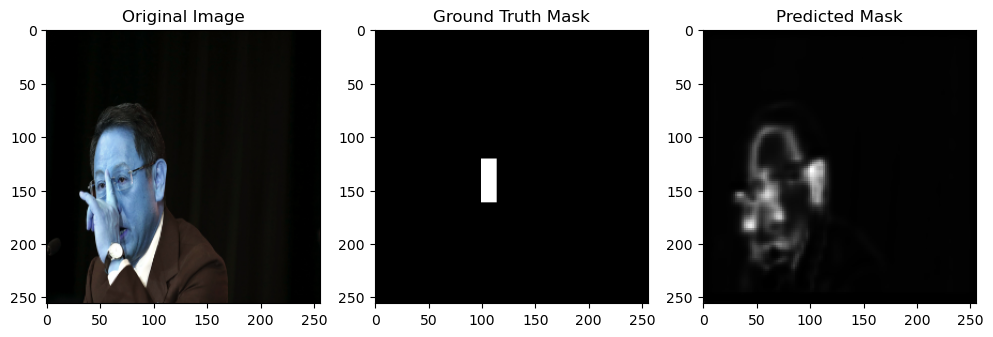

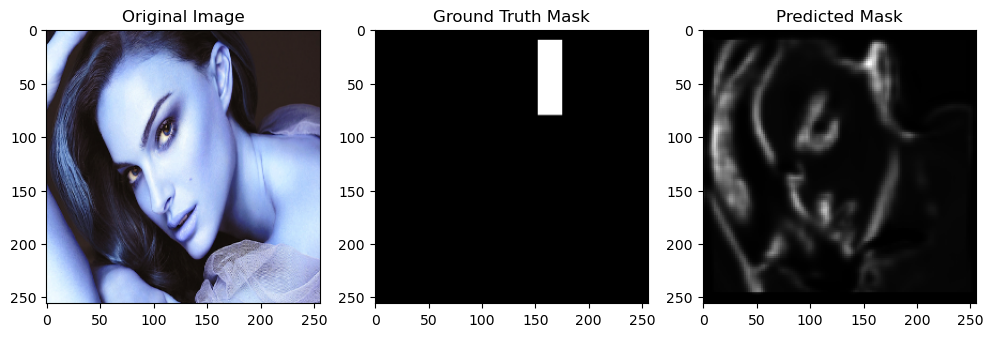

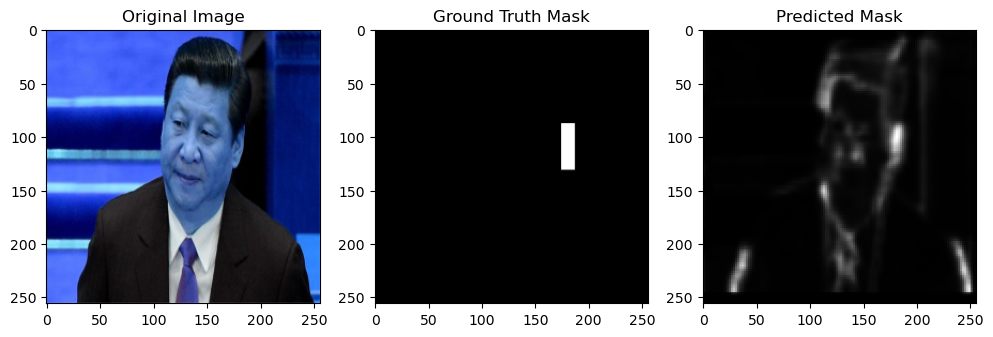

In [54]:
def visualize_prediction(index):
    for i in range(0,index):
        plt.figure(figsize=(12, 8))

        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(X_val[i]) 
        plt.title('Original Image')

        # Ground truth mask
        plt.subplot(1, 3, 2)
        plt.imshow(y_val[i].squeeze(), cmap='gray')
        plt.title('Ground Truth Mask')

        # Predicted mask
        plt.subplot(1, 3, 3)
        plt.imshow(predictions[i], cmap='gray')
        plt.title('Predicted Mask')

        plt.show()
    

visualize_prediction(10) 

In [57]:
path_images = 'test/original_images'
path_masks = 'test/binary_images'

In [60]:
X_test,Y_test = load_images(path_images,path_masks)

Image Files: ['0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '0081.png', '0082.png', '0

In [63]:
predictions = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


In [66]:
model.evaluate(X_test,Y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9836 - loss: 0.0562


[0.058859772980213165, 0.9829616546630859]

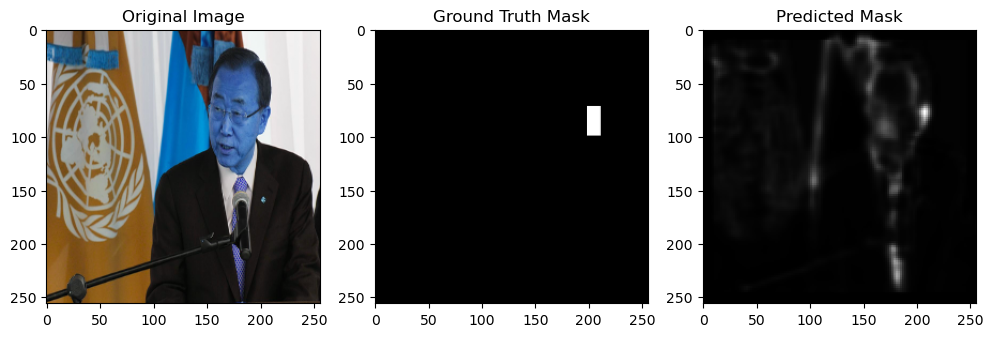

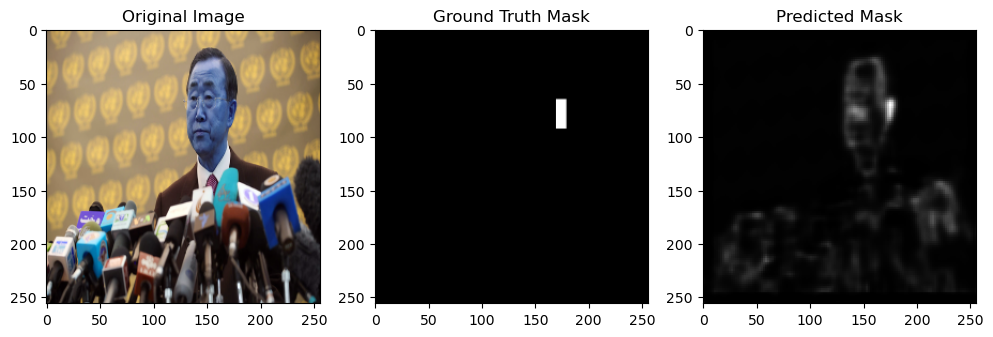

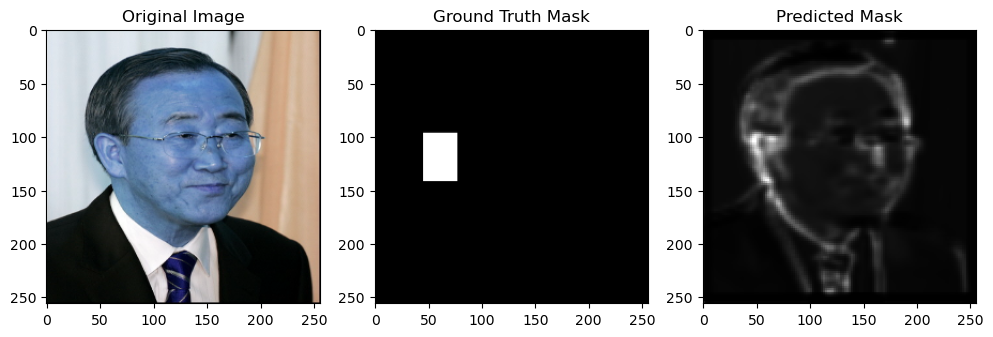

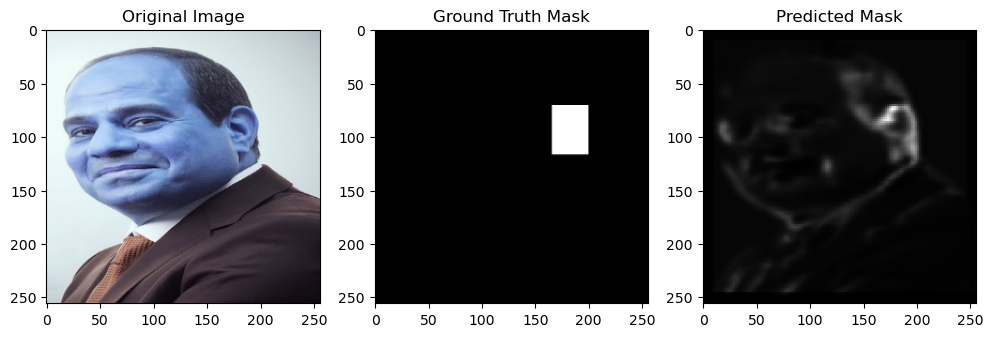

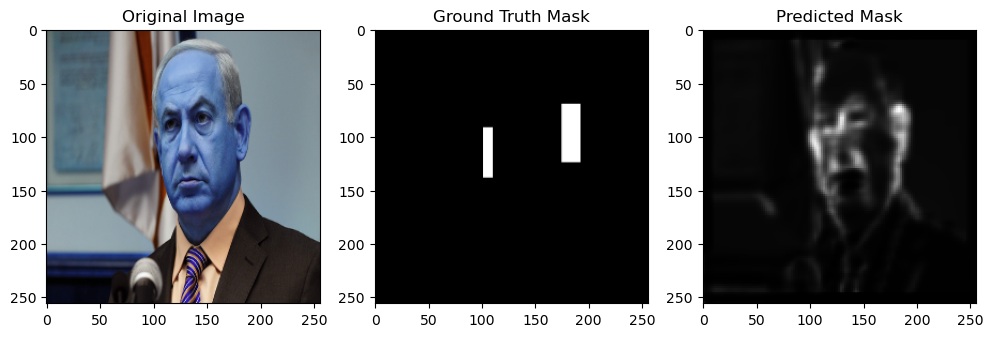

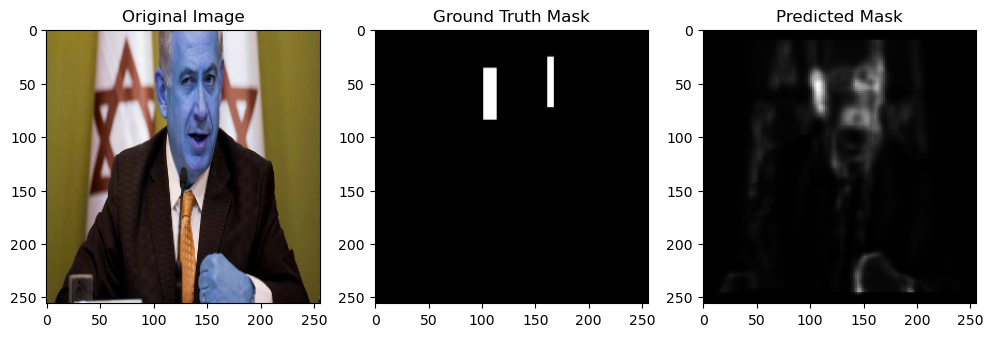

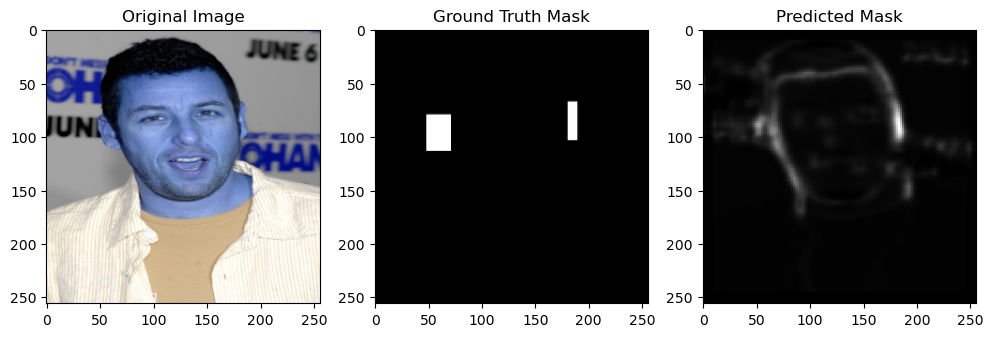

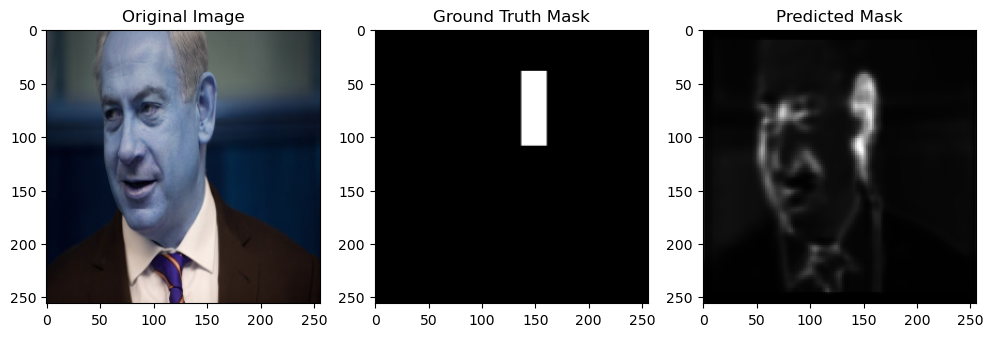

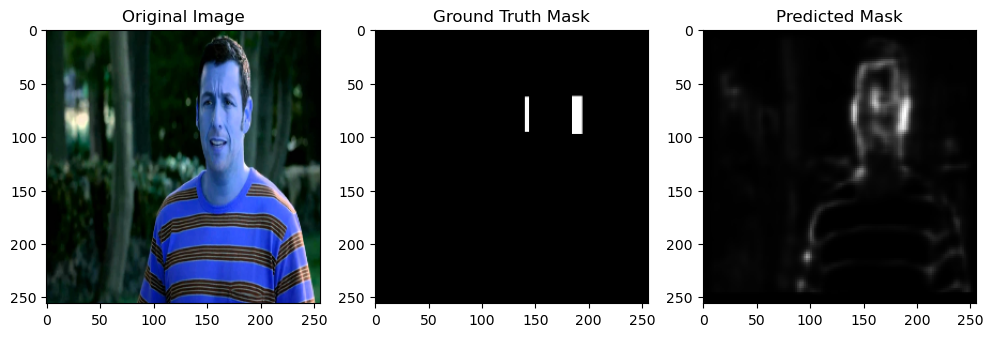

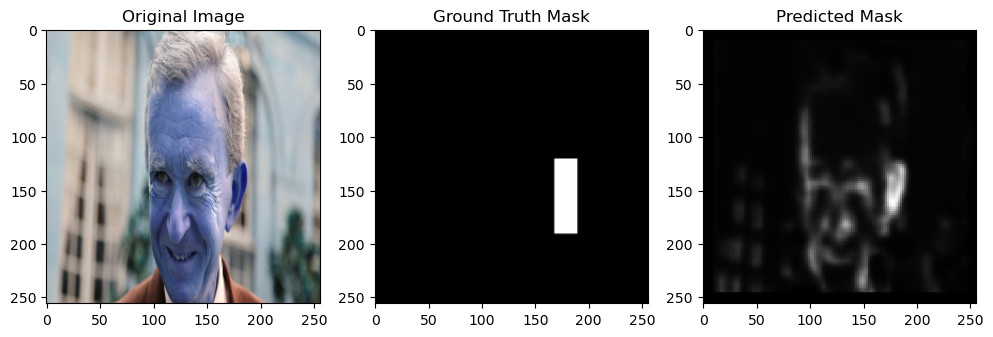

In [69]:
def visualize_prediction(index):
    for i in range(0,index):
        plt.figure(figsize=(12, 8))

        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(X_test[i]) 
        plt.title('Original Image')

        # Ground truth mask
        plt.subplot(1, 3, 2)
        plt.imshow(Y_test[i].squeeze(), cmap='gray')
        plt.title('Ground Truth Mask')

        # Predicted mask
        plt.subplot(1, 3, 3)
        plt.imshow(predictions[i], cmap='gray')
        plt.title('Predicted Mask')

        plt.show()
    

visualize_prediction(10) 